Dataset contains 5268 observations (crashes) and 13 features.
Missing values in the dataset:
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float6

/var/folders/p4/f02y3z810l530mmz7x833j3w0000gn/T/ipykernel_16577/2706112048.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Time'] = data['Time'].str.replace('12\'20', '12:20').str.replace('18.40', '18:40').str.replace('0943', '09:43')


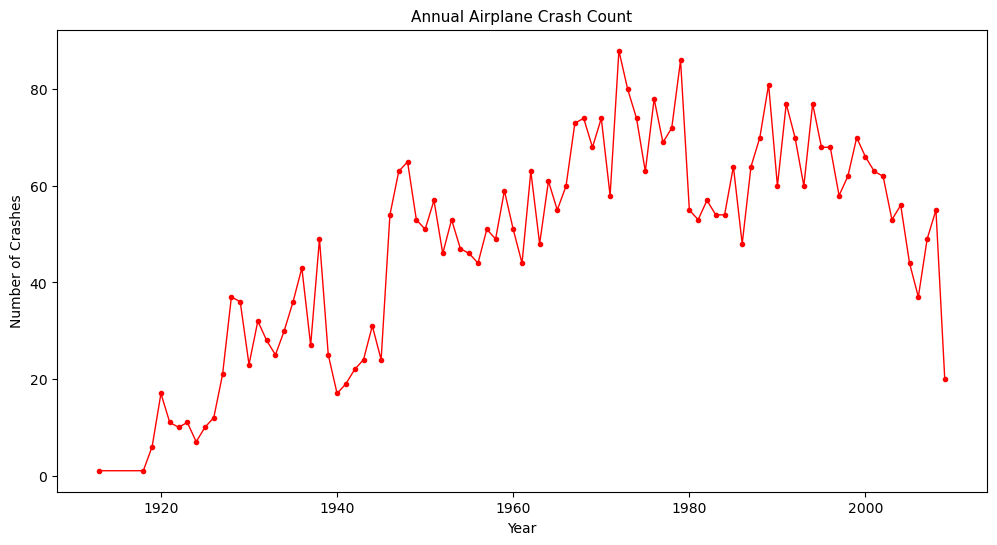

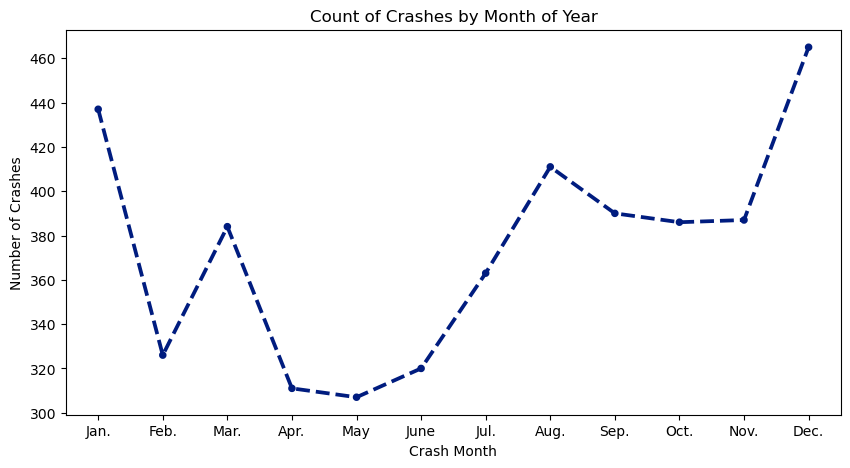

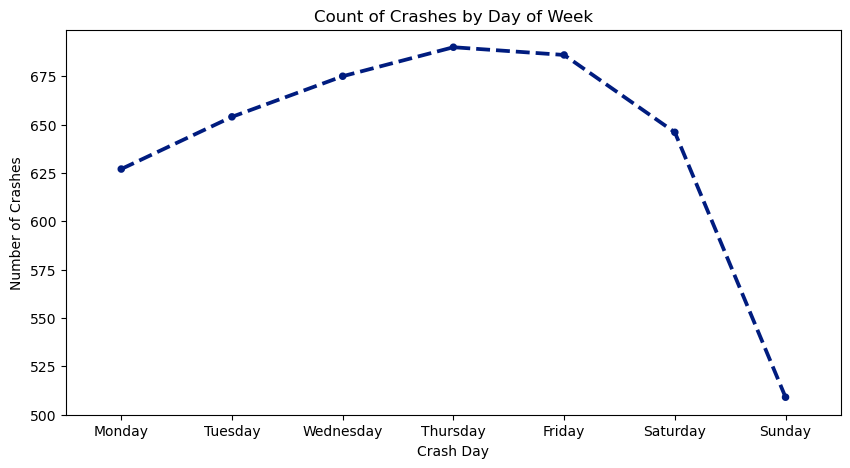

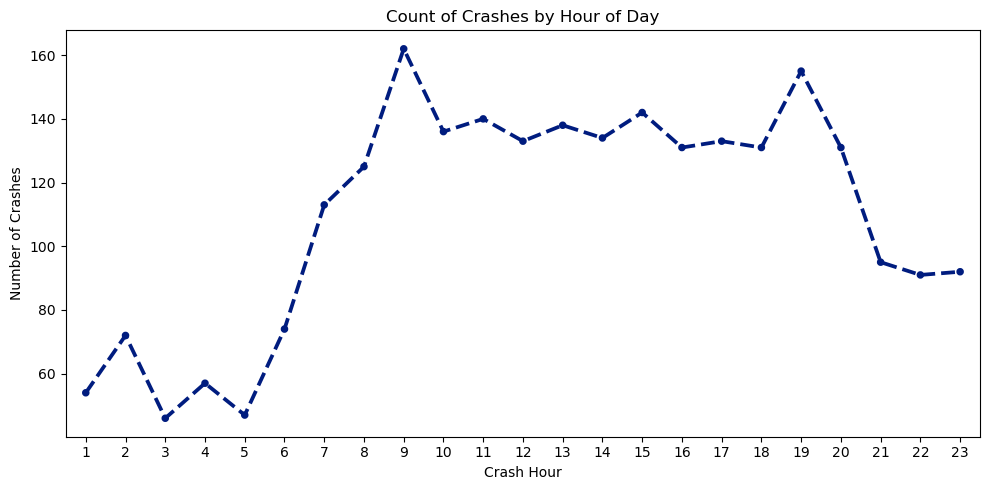

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from PIL import Image

# Load the airplane crashes dataset
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Set a random seed for reproducibility
np.random.seed(42)

# Get the dimensions of the dataset
num_observations, num_features = data.shape
print(f"Dataset contains {num_observations} observations (crashes) and {num_features} features.")

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Display information about the dataset
data.info()

# Data cleaning for the 'Time' column
# Handle missing values and convert the 'Time' column to a consistent format
data['Time'] = data['Time'].fillna('00:00')
data['Time'] = data['Time'].str.replace('c: ', '').str.replace('c:', '').str.replace('c', '')
data['Time'] = data['Time'].str.replace('12\'20', '12:20').str.replace('18.40', '18:40').str.replace('0943', '09:43')
data['Time'] = data['Time'].str.replace('22\'08', '22:08').str.replace('114:20', '00:00')

# Combine 'Date' and 'Time' columns into a single datetime column
data['Time'] = data['Date'] + ' ' + data['Time']
data['Time'] = data['Time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))

print(f'Dates range from {data.Time.min()} to {data.Time.max()}')

# Convert the 'Operator' column to uppercase
data['Operator'] = data['Operator'].str.upper()

# Create a copy of the DataFrame and add an 'isMilitary' column
temp = data.copy()
temp['isMilitary'] = temp['Operator'].str.contains('MILITARY')

# Create a DataFrame for non-military crashes
data_non_military = temp[~temp['isMilitary'].fillna(False)]

# Group and count military vs. passenger crashes
military_counts = temp['isMilitary'].fillna(False).value_counts().rename({False: 'Passenger', True: 'Military'})

# Create a figure for the annual crash count
plt.figure(figsize=(12, 6))
temp = data_non_military.groupby(data_non_military.Time.dt.year)[['Date']].count()
temp = temp.rename(columns={"Date": "Count"})
plt.plot(temp.index, 'Count', data=temp, color='red', marker=".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Crashes', fontsize=10)
plt.title('Annual Airplane Crash Count', loc='Center', fontsize=11)
plt.show()

# Create separate figures for each set of point plots
plt.figure(figsize=(10, 5))
sns.set_palette("dark")

# Plot 1: Count of Crashes by Month of Year
sns.pointplot(
    x=data_non_military.groupby(data_non_military.Time.dt.month)[['Date']].count().index - 1,
    y='Date',
    data=data_non_military.groupby(data_non_military.Time.dt.month)[['Date']].count(),
    markers=".",
    linestyles="--"
)
plt.xticks(range(12), ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
plt.xlabel('Crash Month', fontsize=10)
plt.ylabel('Number of Crashes', fontsize=10)
plt.title('Count of Crashes by Month of Year', loc='Center', fontsize=12)
plt.show()

# Plot 2: Count of Crashes by Day of Week
plt.figure(figsize=(10, 5))
sns.pointplot(
    x=data_non_military.groupby(data_non_military.Time.dt.weekday)[['Date']].count().index,
    y='Date',
    data=data_non_military.groupby(data_non_military.Time.dt.weekday)[['Date']].count(),
    markers=".",
    linestyles="--"
)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Crash Day', fontsize=10)
plt.ylabel('Number of Crashes', fontsize=10)
plt.title('Count of Crashes by Day of Week', loc='Center', fontsize=12)
plt.show()

# Plot 3: Count of Crashes by Hour of Day
plt.figure(figsize=(10, 5))
sns.pointplot(
    x=data_non_military[data_non_military.Time.dt.hour != 0].groupby(data_non_military.Time.dt.hour)[['Date']].count().index,
    y='Date',
    data=data_non_military[data_non_military.Time.dt.hour != 0].groupby(data_non_military.Time.dt.hour)[['Date']].count(),
    markers=".",
    linestyles="--"
)
plt.xlabel('Crash Hour', fontsize=10)
plt.ylabel('Number of Crashes', fontsize=10)
plt.title('Count of Crashes by Hour of Day', loc='Center', fontsize=12)
plt.tight_layout()
plt.show()


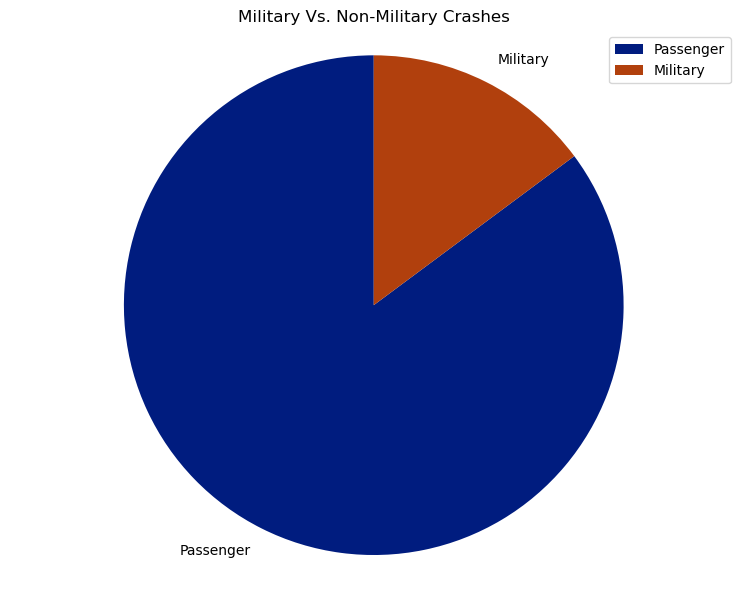

In [72]:
# Create a pie chart to compare military and non-military crash counts
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp_counts, labels=Temp_counts.index, startangle=90)
plt.legend(patches, Temp_counts.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Military Vs. Non-Military Crashes', loc='Center', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/p4/f02y3z810l530mmz7x833j3w0000gn/T/ipykernel_16577/1252139658.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_fatalities = Data_non_military.groupby(Data_non_military.Time.dt.year).sum()


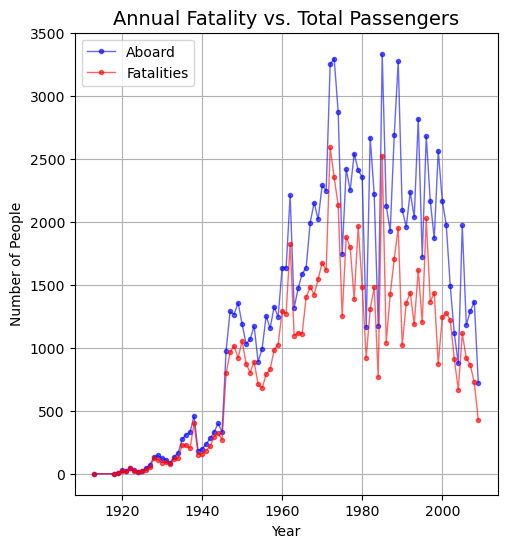

In [64]:
# Calculate annual fatalities and proportions
annual_fatalities = Data_non_military.groupby(Data_non_military.Time.dt.year).sum()
annual_fatalities['Proportion'] = annual_fatalities['Fatalities'] / annual_fatalities['Aboard']

# Create a figure for annual fatalities versus total number of passengers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Plot the number of people aboard over the years
plt.plot(annual_fatalities.index, 'Aboard', data=annual_fatalities, marker=".", color="blue", alpha=0.6, linewidth=1, label='Aboard')

# Plot the number of fatalities over the years
plt.plot(annual_fatalities.index, 'Fatalities', data=annual_fatalities, marker=".", color="red", alpha=0.6, linewidth=1, label='Fatalities')

plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of People', fontsize=10)
plt.title('Annual Fatality vs. Total Passengers', loc='Center', fontsize=14)
plt.grid(True)

# Load and preprocess data for totals and fatalities
totals = pd.read_csv('API_IS.AIR.DPRT_DS2_en_csv_v2_5363295.csv')
totals = totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
totals = totals.fillna(0)
totals = pd.DataFrame(totals.sum())
totals = totals.drop(totals.index[0:10])
totals = totals.loc['1970':'2008']
totals.columns = ['Sum']
totals.index.name = 'Year'

# Reset index for annual fatalities and format it for merging
annual_fatalities = annual_fatalities.reset_index()
annual_fatalities['Year'] = annual_fatalities['Time'].astype(str)
annual_fatalities.index = annual_fatalities['Year']
del annual_fatalities['Year']
annual_fatalities = annual_fatalities.loc['1970':'2008']
annual_fatalities = annual_fatalities[['Fatalities']]

# Join the two data frames into one
totals = pd.concat([totals, annual_fatalities], axis=1)

# Calculate the ratio of fatalities to the total number and convert to percentage
totals['Ratio'] = (totals['Fatalities'] / totals['Sum']) * 100


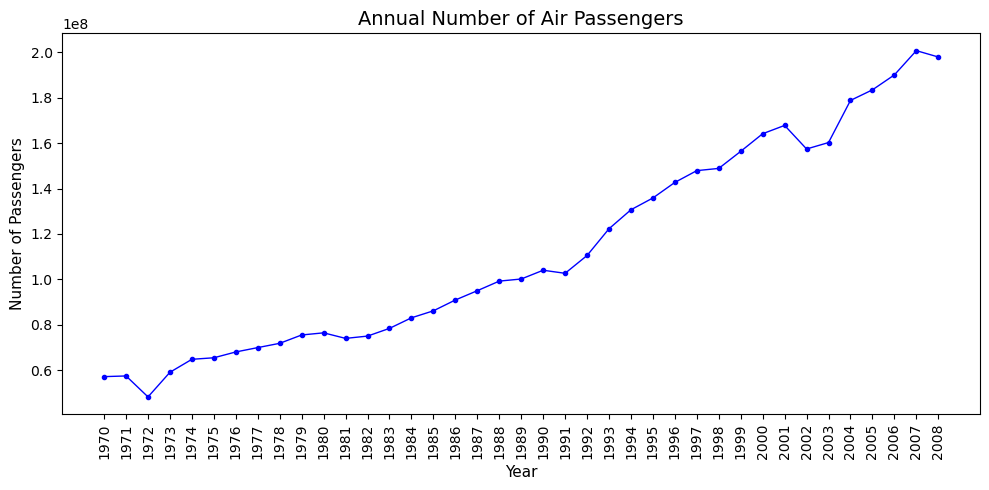

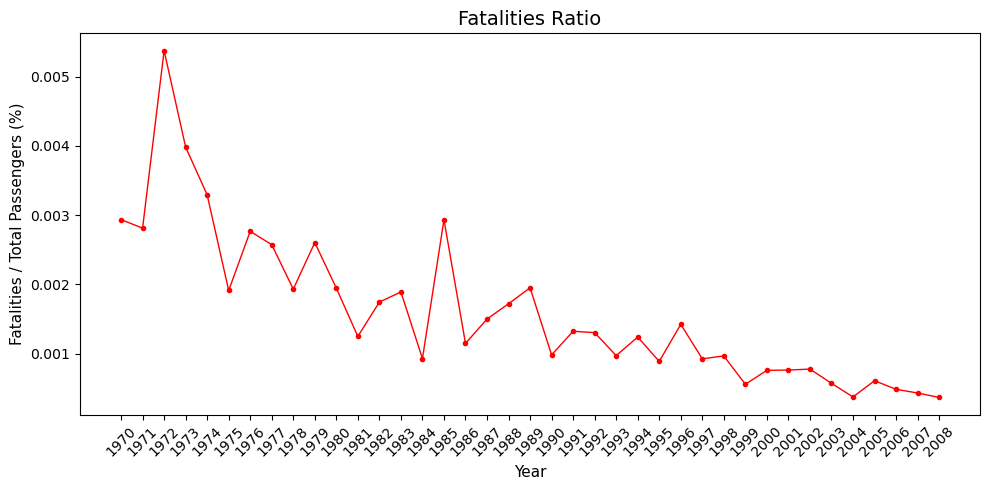

In [65]:
# Plot 1: Annual number of air passengers
plt.figure(figsize=(10, 5))
plt.plot(totals.index, 'Sum', data=totals, marker=".", color='blue', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Passengers', fontsize=11)
plt.title('Annual Number of Air Passengers', loc='Center', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 2: Fatalities Ratio
plt.figure(figsize=(10, 5))
plt.plot(totals.index, 'Ratio', data=totals, color='red', marker=".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Fatalities / Total Passengers (%)', fontsize=11)
plt.title('Fatalities Ratio', loc='Center', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


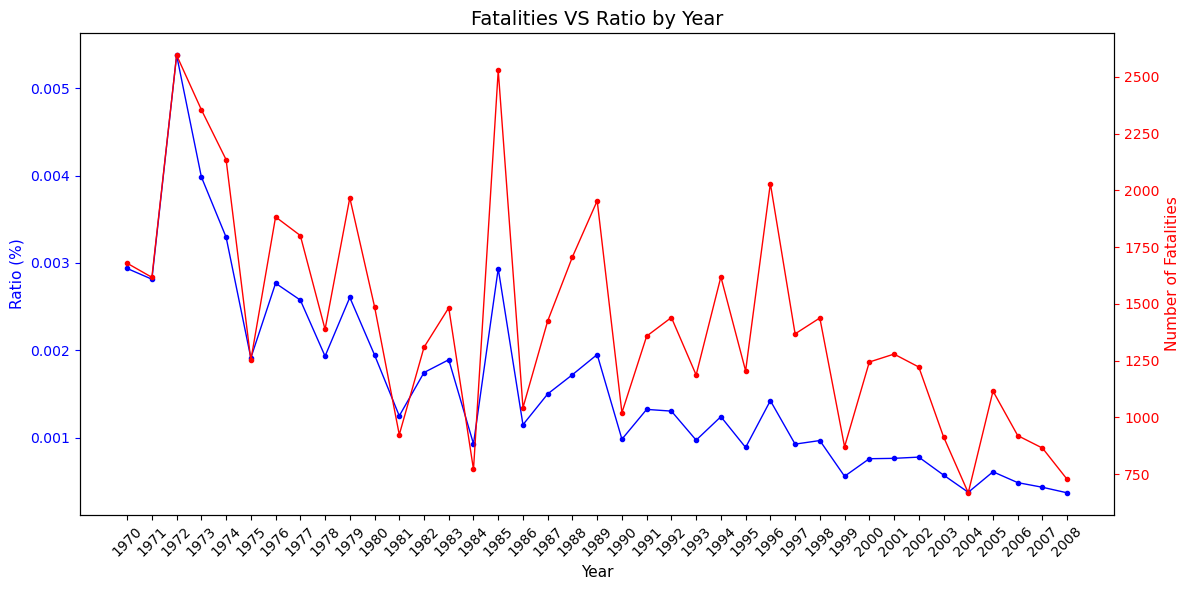

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Ratio on the left y-axis
ax1.plot(totals.index, 'Ratio', data=totals, color='blue', marker=".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.set_ylabel('Ratio (%)', color='blue', fontsize=11)
ax1.tick_params('y', colors='blue')

# Create a twin y-axis for the Number of Fatalities
ax2 = ax1.twinx()
ax2.plot(annual_fatalities.index, 'Fatalities', data=annual_fatalities, color='red', marker=".", linewidth=1)
ax2.set_ylabel('Number of Fatalities', color='red', fontsize=11)
ax2.tick_params('y', colors='red')

# Set the plot title
plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()


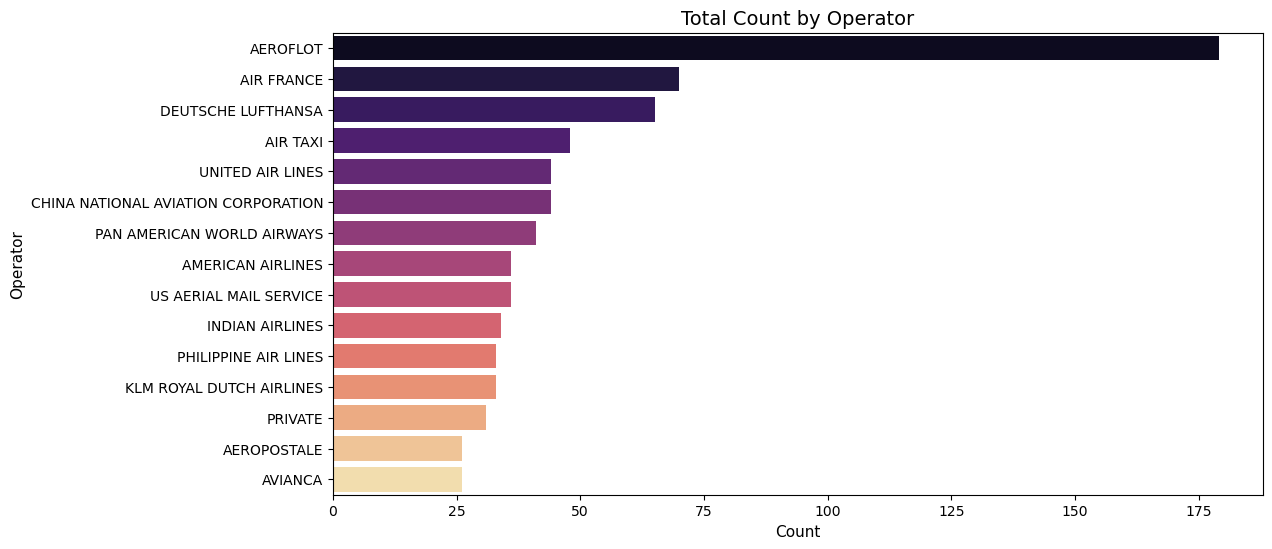

In [73]:
# Data preprocessing
Data.Operator = Data_non_military.Operator.str.upper()
Data.Operator = Data_non_military.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

# Calculate and select the top 15 operators with the highest count
total_by_op = Data_non_military.groupby('Operator')[['Operator']].count().rename(columns={"Operator": "Count"})
total_by_op = total_by_op.sort_values(by='Count', ascending=False).head(15)

# Create a bar plot to visualize count of crashes by operator
plt.figure(figsize=(12, 6))
sns.barplot(y=total_by_op.index, x="Count", data=total_by_op, palette="magma")
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Operator', loc='Center', fontsize=14)
plt.show()


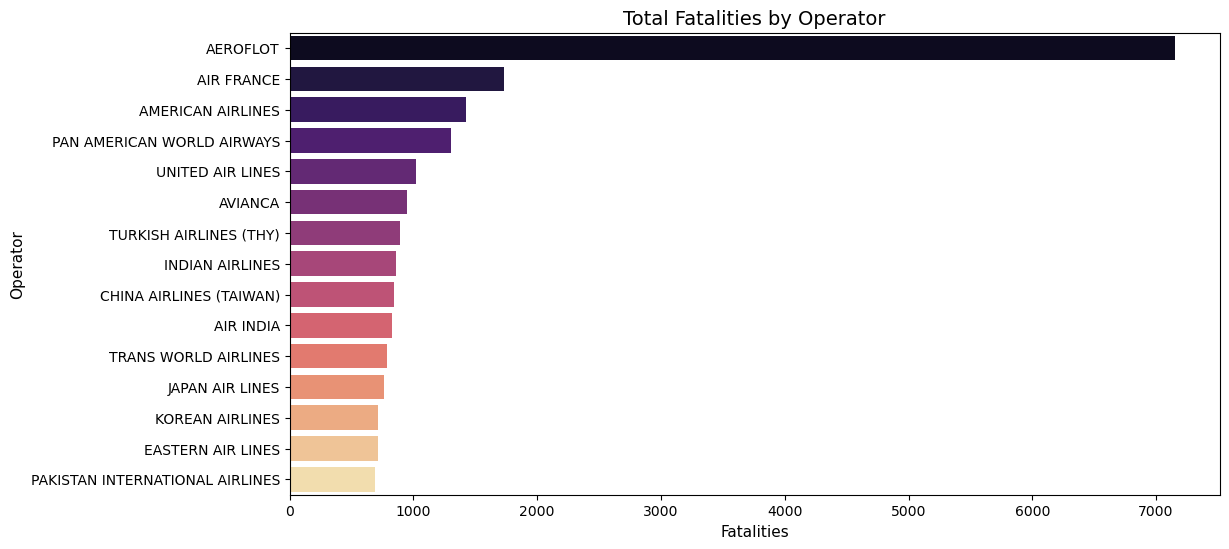

In [74]:
# Group data by 'Operator' and sum the 'Fatalities' column
Prop_by_Op = Data_non_military.groupby('Operator')[['Fatalities']].sum()

# Rename the 'Operator' column to 'Fatalities' and sort by 'Fatalities'
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"}).sort_values(by='Fatalities', ascending=False)

# Select the top 15 operators with the highest fatalities
Prop_by_OpTOP = Prop_by_Op.head(15)

# Create a bar plot to visualize total fatalities by operator
plt.figure(figsize=(12, 6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="magma")
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Operator', loc='Center', fontsize=14)
plt.show()

In [69]:
# Find the index (operator name) where 'Fatalities' is equal to the minimum 'Fatalities' value
min_fatalities_operators = Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()
print(min_fatalities_operators)

['US AIRWAYS', 'CENTURIAN AIR CARGO', 'ARARAT AVIA', 'ISLAND SKY FERRY - AIR TAXI', 'WESTERN HELICOPTER', 'HEWA BORA AIRWAYS', 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE', 'AMERICAN INTERNATIONAL AIRWAYS', 'CANADIAN AIR TRANSAT', 'SOUTHWEST AIRLINES']


(4487, 14)
Most Common Terms per Cluster:


/Users/erfanhajibandeh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


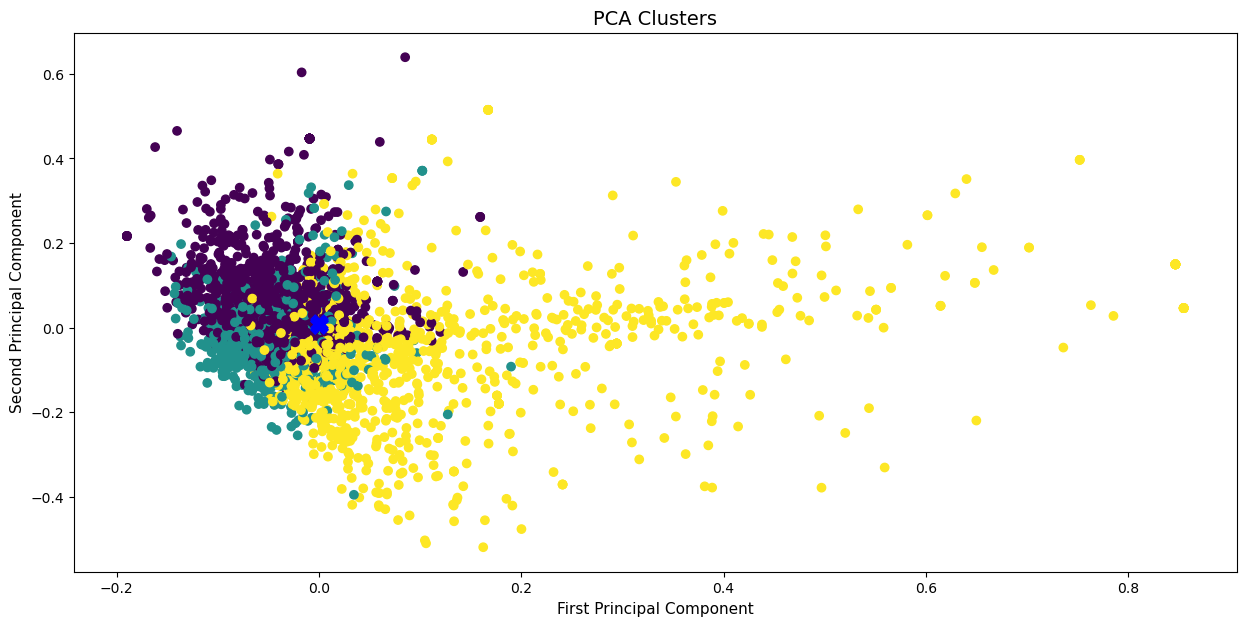

Size of cluster 1: 2149
Size of cluster 2: 867
Size of cluster 3: 1130


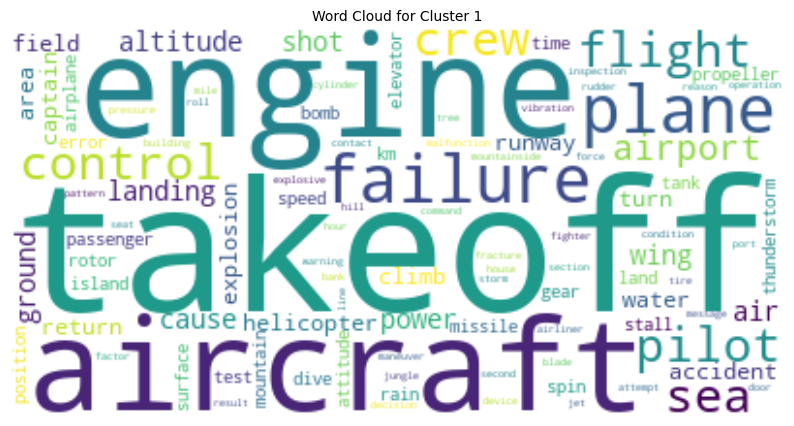

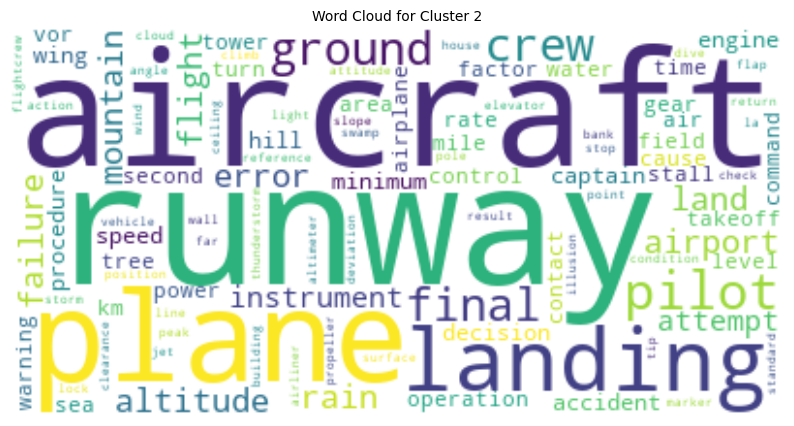

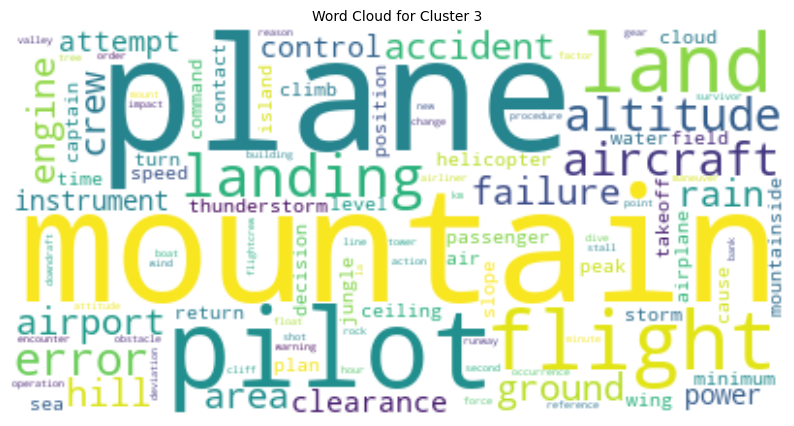

In [70]:
# Check the shape of the dataset and select 'Summary' column
print(Data_non_military.shape)
text_data = Data_non_military['Summary'].dropna()
text_data = pd.DataFrame(text_data)

# Get the text data as a list
documents = list(text_data['Summary'])

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Set a random seed for reproducibility
random_state = 0

# Create and fit the MiniBatchKMeans clustering model with 3 clusters
model = MiniBatchKMeans(n_clusters=3, random_state=random_state)
model.fit(X)

# Print the most common terms per cluster
print('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Reduce the features to 2D using PCA
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# Create a scatter plot of the PCA clusters
plt.figure(figsize=(15, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='X', s=150, c='b')
plt.xlabel('First Principal Component', fontsize=11)
plt.ylabel('Second Principal Component', fontsize=11)
plt.title('PCA Clusters', loc='Center', fontsize=14)
plt.show()

# Print the size of each cluster
for i in range(3):
    cluster_size = model.labels_[model.labels_ == i].size
    print(f"Size of cluster {i + 1}: {cluster_size}")

# Generate word clouds for all clusters
for i in range(3):
    z = []
    for j in order_centroids[i, :]:  # Replace 10 with the number of words per cluster
        z.append(terms[j])

    wc = WordCloud(background_color="white", max_words=100)
    wc.generate(" ".join(z))

    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for Cluster {i + 1}', loc='Center', fontsize=10)
    plt.show()
